In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
%cd /mnt/c/

/mnt/c


In [10]:
results = pd.read_csv(r'Users/tomje/Downloads/hparams_table.csv')
results.rename(columns={
    'CV MAE (µm)':'CV MSE (µm²)',
    'CV MSE (µm²)':'CV MAE (µm)',
    'CV Std MAE (± µm)':'CV Std MSE (± µm²)',
    'CV Std MSE (± µm²)':'CV Std MAE (± µm)'},
              inplace=True)
results.sort_values(by=['epochs','no_nodes']).reset_index(drop=True)

,no_nodes,loss,epochs,CV MSE (µm²),CV MAE (µm),CV R²,CV Std MSE (± µm²),CV Std MAE (± µm),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
0,64.0,mse,500.0,14.588871,2.083518,0.883250,11.384579,0.562699,0.078568,2.131342,15.687549,0.875092
1,64.0,mae,500.0,21.286358,2.238127,0.842044,14.604764,0.648397,0.093545,2.392713,19.055147,0.810163
2,128.0,mse,500.0,18.421293,2.145353,0.848144,15.246595,0.624597,0.110262,2.699312,27.068676,0.804198
3,128.0,mae,500.0,18.910698,1.989305,0.843567,15.390326,0.535418,0.118866,2.258043,16.979767,0.879610
4,256.0,mse,500.0,12.152678,1.736117,0.903415,12.323786,0.532341,0.080969,3.751863,32.719082,0.779915
5,256.0,mae,500.0,16.665768,1.925542,0.864337,13.356540,0.522122,0.099412,3.428225,31.670349,0.767396
6,64.0,mse,1000.0,14.521611,1.972446,0.889031,9.784192,0.553093,0.073370,1.754449,7.271685,0.921737
7,64.0,mae,1000.0,18.437008,1.758000,0.852355,16.698069,0.539673,0.117140,1.361760,8.482882,0.940245
8,128.0,mse,1000.0,12.703791,1.864635,0.901307,8.228697,0.477438,0.057223,1.642313,12.589154,0.875357
9,128.0,mae,1000.0,20.490103,2.179789,0.851659,18.642582,0.708544,0.091034,1.887433,8.142917,0.919756


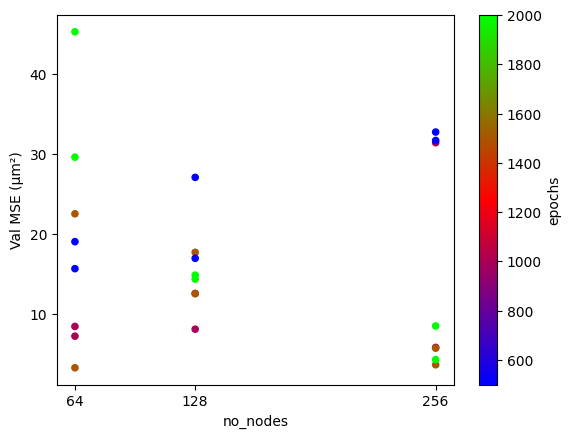

In [43]:
ax1 = results.plot.scatter(x='no_nodes', y='Val MSE (µm²)', colormap='brg', c='epochs')
ax1.set_xticks([64, 128, 256])

,CV MSE (µm²),CV MAE (µm),CV R²,CV Std MSE (± µm²),CV Std MAE (± µm),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
epochs,,,,,,,,,
500.0,17.004278,2.019660,0.864126,13.717765,0.570929,0.096937,2.776916,23.863428,0.819395
1000.0,17.422722,1.981522,0.866648,14.765195,0.585051,0.094707,1.695807,12.292226,0.890708
1500.0,16.572525,1.868677,0.873524,16.122064,0.581005,0.101835,1.554952,10.941372,0.911278
2000.0,16.919761,1.834680,0.869212,16.197499,0.559811,0.113928,1.829229,19.493372,0.845502


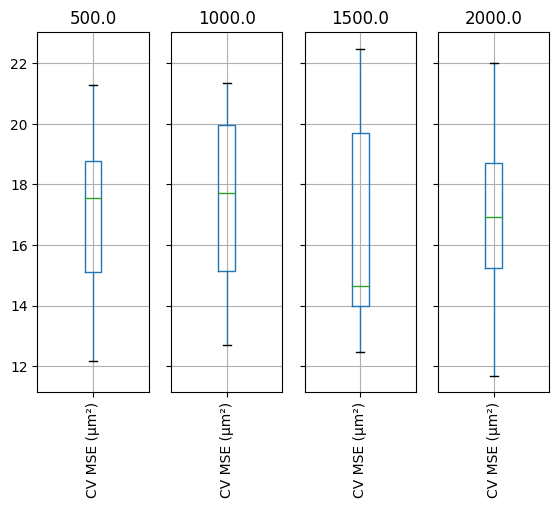

In [34]:
epoch_df = results.groupby(['epochs'])
epoch_df.boxplot(column=['CV MSE (µm²)'], layout=(1,4), rot=90);
results.groupby(['epochs']).mean(numeric_only=True).drop(columns=['no_nodes'])


,CV MSE (µm²),CV MAE (µm),CV R²,CV Std MSE (± µm²),CV Std MAE (± µm),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
loss,,,,,,,,,
mae,19.554866,1.971641,0.849496,18.278404,0.616040,0.119504,2.019894,18.557142,0.855091
mse,14.404778,1.880629,0.887260,12.122858,0.532357,0.084200,1.908558,14.738058,0.878351


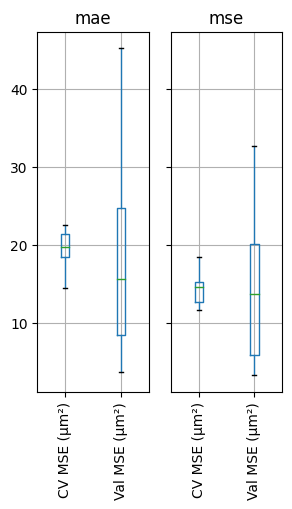

In [12]:
loss_df = results.groupby(['loss'])
loss_df.boxplot(column=['CV MSE (µm²)', 'Val MSE (µm²)'], layout=(1,4), rot=90);
results.groupby(['loss']).mean().drop(columns=['no_nodes', 'epochs'])

,CV MSE (µm²),CV MAE (µm),CV R²,CV Std MSE (± µm²),CV Std MAE (± µm),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
no_nodes,,,,,,,,,
64.0,17.245520,1.934288,0.866795,15.982318,0.598369,0.106262,2.011992,18.895572,0.851009
128.0,15.935943,1.890359,0.874972,13.736355,0.543311,0.094683,1.868975,15.544082,0.870409
256.0,17.758002,1.953759,0.863366,15.883219,0.580916,0.104610,2.011711,15.503145,0.878745


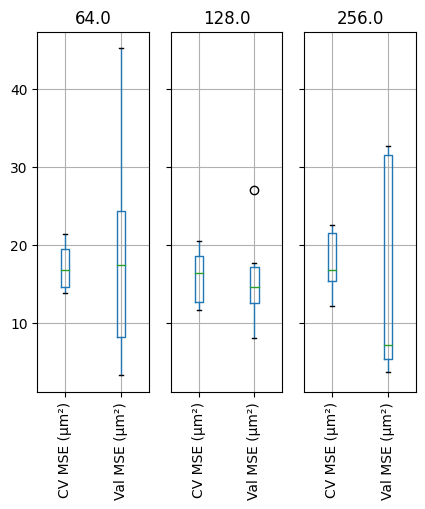

In [14]:
no_nodes_df = results.groupby(['no_nodes'])
no_nodes_df.boxplot(column=['CV MSE (µm²)', 'Val MSE (µm²)'], layout=(1,4), rot=90);
results.groupby(['no_nodes']).mean(numeric_only=True).drop(columns=['epochs'])